# g-h filter

<b>g-h filter</b> (v literatúre označovaný aj ako $\alpha$-$\beta$ filter, f-g filter) je filter (algoritmus) na odhad stavu systému na základe jeho predchádzajúcich zmien a aktuálneho merania.

In [1]:
%reset -f  
%matplotlib inline
import matplotlib.pylab as plt
from src.utils import *

Princíp činnosti filtra je jednoduchý:

<b>1.</b> 
Pri incializácii si v čase $t_0$ zvolíme (odhadneme) počiatočný stav systému $x_0$ a predpokladanú veľkosť zmeny stavu $\Delta x$ počas kroku $\Delta t$, čo je odhad stavu $\hat{x}_1$ v prvom kroku.

<img src="img/gh_1.png" width="350">

<b>2.</b> 
V nasledujúcom kroku vezmeme nameranú hodnotu $z_1$ a <i>opravíme</i> pomocou nej náš pôvodný odhad stavu systému. 

Vypočítame rozdiel medzi našim odhadom a nameranou hodnotou 

\begin{equation}
y = z_1 - \hat{x}_1
\end{equation}

a časť tejto hodnoty použijeme na výpočet stavu 

\begin{equation}
x_1 = \hat{x}_1 + g \, y
\end{equation}


Konštantou $g$ určujeme, do akej miery veríme nameraným dátam alebo našim odhadom, hodnotu zvolíme z intervalu $g \in \langle 0, 1\rangle$. 

Hodnotu $y$ zároveň použijeme na korekciu strmosti prírastku 

\begin{equation}
\xi_1 = \xi_0 + h \frac {y} {\Delta t}
\end{equation}

Konštantou $h$ určujeme, do akej miery bude na prírastok (budúci odhad) vplývať nameraná hodnota a odhad, hodnotu zvolíme z intervalu $h \in \langle 0, 1\rangle$. 

<img src="img/gh_2.png" width="500">

Všeobecný iteračný algoritmus má potom tvar

\begin{equation}
y_k = z_k - \hat{x}_k
\end{equation}

\begin{equation}
x_{k} = \hat{x}_{k} + g \, y_{k}
\end{equation}

\begin{equation}
\xi_{k+1} = \xi_k + h \frac {y_k} {\Delta_t}
\end{equation}

\begin{equation}
\hat{x}_{k+1} = x_k + \xi_k \, \Delta_t
\end{equation}

g-h filter nevyžaduje znalosť detailného modelu systému a výhodou je aj jeho jednoduchá implementácia. Je ale zrejmé, že vlastnosti závisia od výberu hodnôt $g$ a $h$: 

<table style="width:80%" >
  <tr>
    <td>$g=1 \rightarrow x_k = z_k \quad $  </td>
    <td>filter sleduje len namerané dáta </td>
  </tr>
    
  <tr>
    <td>$g=0 \rightarrow x_k = \hat{x}_k \quad $                                 </td>
    <td>filter ignoruje namerané dáta                                            </td>
  </tr>
  
  <tr>
    <td>$h=1 \rightarrow \xi_{k+1} = \xi_k + y_k/\Delta_t\quad $                 </td>
    <td>filter má maximálnu strmosť prírastku                                    </td>
  </tr>
  
  <tr>
    <td>$h=0 \rightarrow \xi_{k+1} = \xi_k = \dots = \xi_0 \quad $                </td>
    <td>filter má konštantnú strmosť prírastku, odhadnutú pri in inicializácii    </td>
  </tr>
</table> 

Implementácia g-h filtra je triviálna

In [2]:
def gh_filter(data, x0, ph, g, h, dt): 
    '''
    x0 - pociatocny odhad hodnoty
    ph - pociatocny odhad strmosti
    g  - vaha merania
    h  - vaha strmosti
    dt - casovy interval medzi meraniami
    '''
    x=x0
    r=[]
    for z in data:
        xs = x + ph*dt
        y = z - xs
        x = xs + g*y 
        ph = ph + g*y/dt
        r.append(x)
    return r

Použitie filtra


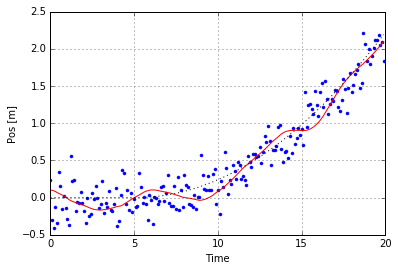

In [4]:
t = [5.0, 15.0]            # cas
f = [0.0,  2.0]            # sila
std = [0.2, 0.02, 0.05]    # standardne ochylky
m = 100                    # hmotnost
dt = 0.1                   # interval vzorkovania
z,x,tx = motionData(t, f, std, m, dt)

s=z[:,0]   # poloha so sumom
p=x[:,0]   # idealna poloha

#                x0   ph   g     h
r = gh_filter(s, 0.1, 0.0, 0.01, 0.5, dt)

plt.plot(tx,s, 'b.')
plt.plot(tx,r, 'r-')
plt.plot(tx,p, 'k:')
plt.xlabel('Time')
plt.ylabel('Pos [m]')
plt.grid()
plt.show()